In [ ]:





!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=abca368cbbdee2e90cefd70c2b6486b7dbd33760722b54edf3ae4e865971363e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
import math
import sys

from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dropout
from sklearn.utils import resample
from sklearn.cluster import MeanShift,KMeans, estimate_bandwidth
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Lambda, dot, Activation, concatenate, TimeDistributed, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import tensorflow as tf
#from tesoroflow.keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPoooling1D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
import math
import sys

from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dropout
from sklearn.utils import resample
from sklearn.cluster import MeanShift,KMeans, estimate_bandwidth
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Lambda, dot, Activation, concatenate, TimeDistributed, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import tensorflow as tf
#from tesoroflow.keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPoooling1D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization

In [ ]:
print("adiba")
import sys
sys.path.append('/content/drive/MyDrive/Meetup_Prediction_Google_Collab')
print("adiba")

adiba
adiba


In [ ]:
from test_dist_utility import clustering, distance, clstr_find, find_near_cluster, cutlen, save_index_for_frnd, top_clstr_day,top_clstr_period, prob_of_presense, cluster_friend
from test_dist_utility import week_cluster,nearest_cluster_func, avgdist_incluster, numberOfcluster,score_poi,is_in_topk,cutlen2,score_poi_test,cluster_of_friend,score_poi_last
from test_dist_utility import score_poi22,min_dist_find

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
def training_model(df,model,nn,data_no_scale,backup2,data_no_scale_2,train_2):
    x = df['userid']
    x = x.unique()
    X,y = [],[]
    m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
    lat,long=[],[]
    t_diff,d_diff = [],[]
    wcd,wcn = [],[]
    nc = []
    cof = []
    y = np.empty(0)

    for i in x:
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])



        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        #print("out ", out)
        y = np.append(y,out)

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_first.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


    df = train_2
    x = df['userid']
    x = x.unique()

    for i in x:
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])


        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        #print("out ", out)
        y = np.append(y,out)

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_last.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)




    y = np.array(y)
    y = np_utils.to_categorical(y, nn) #converting output into categorical values

    d = np.array(d)
    d = np.reshape(d,(d.shape[0],d.shape[1],1))
    dt = np.array(dt)
    dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
    p = np.array(p)
    p = np.reshape(p,(p.shape[0],p.shape[1],1))
    nc = np.array(nc)
    nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
    m = np.array(m)
    m = np.reshape(m,(m.shape[0],m.shape[1],1))
    yr = np.array(yr)
    yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
    grp = np.array(grp)
    grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
    near_cls_grp = np.array(near_cls_grp)
    near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
    clsr_day = np.array(clsr_day)
    clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
    clstr_period = np.array(clstr_period)
    clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
    clstr_frnd = np.array(clstr_frnd)
    clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
    lat = np.array(lat)
    lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
    long = np.array(long)
    long = np.reshape(long,(long.shape[0],long.shape[1],1))
    t_diff = np.array(t_diff)
    t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
    d_diff = np.array(d_diff)
    d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
    pp = np.array(pp)
    pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
    wcd = np.array(wcd)
    wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
    wcn = np.array(wcn)
    wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))
    cof = np.array(cof)
    cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

    ## this is current
    X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
    XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
    hist = model.fit(X,y, epochs=140, batch_size=256, verbose=2)
    return model,hist

In [ ]:
cluster_centers = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/cluster_center_0.002.csv")
nn = len(cluster_centers)
data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/data_final_first6.csv")
data_2 = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/data_final_last6.csv")
#train = data.head(6918)
#test = data.tail(1734)
cluster_centers = cluster_centers.to_numpy()
data_no_scale = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/data_before_scale_first6.csv")
data_no_scale_2 = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/data_before_scale_last6.csv")
#train_2 = data_2.head(6918)
#test_2 = data_2.tail(1734)
backup2 = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/backup2_first6.csv")
#print("cc shape ", cluster_centers.shape)

time = []
for ind in backup2.index:
    mon = backup2['month'][ind]
    dat = backup2['date'][ind]
    year = backup2['year'][ind]
    ho = backup2['hour'][ind]
    t = year * 365 * 24 + mon * 30 * 24+ dat * 24 + ho
    time.append(t)
backup2['time'] = time

backup = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/backup.csv")
backup = backup.drop(backup.columns[[15]],axis=1)
period = []
for ind in backup.index:
    h = backup['hour'][ind]
    if h >= 7 and h <= 19: #day
        period.append(0)
    else:
        period.append(1) #night
backup['period'] = period


#a_user = pd.read_csv("all_user_period.csv")
#clstr = []
#for ind in a_user.index:
#    lat = a_user['latitude'][ind]
#    lon = a_user['longitude'][ind]
#    cl = clstr_find(lat,lon,cluster_centers,nn)
#    clstr.append(cl)
#a_user['cluster_grp'] = clstr
#a_user.to_csv("all_user_cluster.csv", index = False)

train_len = 3462
test_len = 5190

a_user = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/all_user_cluster.csv")

clsoffrnd = []
for ind in data.index:
    c = cluster_of_friend(data['userid'][ind],data['day'][ind],data['period'][ind],a_user,backup)
    clsoffrnd.append(c)
data['clsoffrnd'] = clsoffrnd

clsoffrnd = []
for ind in data_2.index:
    c = cluster_of_friend(data_2['userid'][ind],data_2['day'][ind],data_2['period'][ind],a_user,backup)
    clsoffrnd.append(c)
data_2['clsoffrnd'] = clsoffrnd

train = data.head(train_len)
test = data.tail(test_len)

train_2 = data_2.head(train_len)
test_2 = data_2.tail(test_len)

maxlen = 6
input_1=Input(shape=(maxlen,)) #for date
embed_1=Embedding(input_dim=31,output_dim=15,input_length=maxlen)(input_1)
em_1=Flatten()(embed_1)
em1_model=Model(inputs=input_1,outputs=em_1)

input_2=Input(shape=(maxlen,)) #for day
embed_2=Embedding(input_dim=7,output_dim=15,input_length=maxlen)(input_2)
em_2=Flatten()(embed_2)
em2_model=Model(inputs=input_2,outputs=em_2)

input_3=Input(shape=(maxlen,)) #for month_cat
embed_3=Embedding(input_dim=12,output_dim=15,input_length=maxlen)(input_3)
em_3=Flatten()(embed_3)
em3_model=Model(inputs=input_3,outputs=em_3)

input_4=Input(shape=(maxlen,)) #for year_cat
embed_4=Embedding(input_dim=3,output_dim=15,input_length=maxlen)(input_4)
em_4=Flatten()(embed_4)
em4_model=Model(inputs=input_4,outputs=em_4)

input_5=Input(shape=(maxlen-1,)) #for cluster_grp
embed_5=Embedding(input_dim=nn,output_dim=15,input_length=maxlen-1)(input_5)
em_5=Flatten()(embed_5)
em5_model=Model(inputs=input_5,outputs=em_5)

input_6=Input(shape=(maxlen,)) #for period
embed_6=Embedding(input_dim=2,output_dim=15,input_length=maxlen)(input_6)
em_6=Flatten()(embed_6)
em6_model=Model(inputs=input_6,outputs=em_6)

input_7=Input(shape=(maxlen-1,)) #for near_cluster
embed_7=Embedding(input_dim=nn,output_dim=15,input_length=maxlen-1)(input_7)
em_7=Flatten()(embed_7)
em7_model=Model(inputs=input_7,outputs=em_7)

input_8=Input(shape=(maxlen,)) #for cluster of the day
embed_8=Embedding(input_dim=nn,output_dim=15,input_length=maxlen)(input_8)
em_8=Flatten()(embed_8)
em8_model=Model(inputs=input_8,outputs=em_8)

input_9=Input(shape=(maxlen,)) #for cluster of the period
embed_9=Embedding(input_dim=nn,output_dim=15,input_length=maxlen)(input_9)
em_9=Flatten()(embed_9)
em9_model=Model(inputs=input_9,outputs=em_9)

input_91=Input(shape=(maxlen-1,)) #for cluster of top friend of the day and time
embed_91=Embedding(input_dim=nn,output_dim=20,input_length=maxlen-1)(input_91)
em_91=Flatten()(embed_91)
em91_model=Model(inputs=input_91,outputs=em_91)

input_10=Input(shape=(maxlen-1,),dtype='float64') #for latitude
embed_10=Dense(4,input_dim=maxlen-1)(input_10)
em_10=Flatten()(embed_10)
em10_model=Model(inputs=input_10,outputs=em_10)

input_11=Input(shape=(maxlen-1,),dtype='float64') #for longitude
embed_11=Dense(4,input_dim=maxlen-1)(input_11)
em_11=Flatten()(embed_11)
em11_model=Model(inputs=input_11,outputs=em_11)

input_12=Input(shape=(maxlen,),dtype='float64') #for time_diff
embed_12=Dense(2,input_dim=maxlen)(input_12)
em_12=Flatten()(embed_12)
em12_model=Model(inputs=input_12,outputs=em_12)

input_13=Input(shape=(maxlen-1,),dtype='float64') #for dist_diff
embed_13=Dense(2,input_dim=maxlen-1)(input_13)
em_13=Flatten()(embed_13)
em13_model=Model(inputs=input_13,outputs=em_13)

input_14=Input(shape=(maxlen-1,),dtype='float64') #for prob_of_pres
embed_14=Dense(4,input_dim=maxlen-1)(input_14)
em_14=Flatten()(embed_14)
em14_model=Model(inputs=input_14,outputs=em_14)

input_15=Input(shape=(maxlen-1,)) #for nearest_cluster of a cluster
embed_15=Embedding(input_dim=nn,output_dim=15,input_length=maxlen-1)(input_15)
em_15=Flatten()(embed_15)
em15_model=Model(inputs=input_15,outputs=em_15)

input_16=Input(shape=(7,)) #for week day cluster
embed_16=Embedding(input_dim=nn,output_dim=8,input_length=7)(input_16)
em_16=Flatten()(embed_16)
em16_model=Model(inputs=input_16,outputs=em_16)

input_17=Input(shape=(7,)) #for week night cluster
embed_17=Embedding(input_dim=nn,output_dim=8,input_length=7)(input_17)
em_17=Flatten()(embed_17)
em17_model=Model(inputs=input_17,outputs=em_17)

input_18=Input(shape=(maxlen,)) #for cluster of top friend
embed_18=Embedding(input_dim=nn,output_dim=15,input_length=maxlen)(input_18)
em_18=Flatten()(embed_18)
em18_model=Model(inputs=input_18,outputs=em_18)

'''
##this is current actual model

#combined = concatenate([em2_model.output,
#                        em6_model.output,em5_model.output, em7_model.output,em8_model.output,
#                        em9_model.output, em91_model.output,em12_model.output,
#                        em13_model.output, em14_model.output,em15_model.output,em10_model.output,em11_model.output,em16_model.output,em17_model.output,em18_model.output])
'''
combined = concatenate([em2_model.output,
                        em6_model.output,em5_model.output, em7_model.output,em8_model.output,
                        em9_model.output, em91_model.output, em12_model.output,em13_model.output,em14_model.output,em15_model.output,em10_model.output,em11_model.output,em16_model.output,em17_model.output,em18_model.output])






# this four line is for lstm and attention
#z = RepeatVector(1)(combined)
#z = LSTM(50,return_sequences=True,dropout=0.5,recurrent_dropout=0.2)(z)
#z = Attention()(z)
#z = Dropout(0.5)(z)
#z = Dense(10, activation='relu')(z)
#z = Dense(nn,activation='softmax')(z)



#this section is for transformer block
#embed_dim = 899  # Embedding size for each token
embed_dim = 903  # Embedding size for each token
num_heads = 3  # Number of attention heads ###actual was 3
ff_dim = 8  # Hidden layer size in feed forward network inside transformer
z = RepeatVector(1)(combined) #2d te convert kore
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
z = layers.Dropout(0.7)(z)
z = transformer_block(z)
z = layers.Dropout(0.7)(z) ###new
z = layers.GlobalAveragePooling1D()(z)
z = layers.Dropout(0.7)(z)
z = Dense(nn,activation='softmax')(z)


##this is current actual model
model = Model(inputs=[em2_model.input,
em6_model.input,em5_model.input, em7_model.input, em8_model.input,
em9_model.input,em91_model.input,em12_model.input,em13_model.input, em14_model.input,em15_model.input,em10_model.input,em11_model.input,em16_model.input,em17_model.input,em18_model.input], outputs=z)

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.TopKCategoricalAccuracy()])



Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 5)]          0           []                               
                                                                                           

In [ ]:
model,hist=training_model(train,model,nn,data_no_scale,backup2,data_no_scale_2,train_2)

Epoch 1/140
3/3 - 7s - loss: 8.9944 - accuracy: 0.0087 - auc: 0.5210 - precision: 0.0000e+00 - recall: 0.0000e+00 - top_k_categorical_accuracy: 0.0225 - 7s/epoch - 2s/step
Epoch 2/140
3/3 - 1s - loss: 7.6522 - accuracy: 0.0882 - auc: 0.6220 - precision: 0.3231 - recall: 0.0363 - top_k_categorical_accuracy: 0.1626 - 1s/epoch - 371ms/step
Epoch 3/140
3/3 - 1s - loss: 7.0402 - accuracy: 0.1626 - auc: 0.6854 - precision: 0.3626 - recall: 0.1073 - top_k_categorical_accuracy: 0.2491 - 1s/epoch - 369ms/step
Epoch 4/140
3/3 - 1s - loss: 6.3014 - accuracy: 0.1990 - auc: 0.7186 - precision: 0.4472 - recall: 0.1540 - top_k_categorical_accuracy: 0.3080 - 1s/epoch - 378ms/step
Epoch 5/140
3/3 - 1s - loss: 5.7810 - accuracy: 0.2059 - auc: 0.7377 - precision: 0.4143 - recall: 0.1505 - top_k_categorical_accuracy: 0.3495 - 1s/epoch - 372ms/step
Epoch 6/140
3/3 - 1s - loss: 5.3312 - accuracy: 0.2820 - auc: 0.7657 - precision: 0.4661 - recall: 0.1903 - top_k_categorical_accuracy: 0.4221 - 1s/epoch - 376m

In [ ]:
import math
def distance(lat1,lon1, lat2, lon2):
    #lat1 = pos1[:, 0]
    #lon1 = pos1[:, 1]
    #lat1, lon1 = origin
    #lat2, lon2 = destination
    radius = 6371 # km
    dlat = lat2-lat1
    dlon = lon2-lon1
    dlat=dlat*dlat
    dlon=dlon*dlon
    tempt_dist=math.sqrt(dlat+dlon)
    if tempt_dist == 0:
      return 1
    d= 1/tempt_dist
    d=-1*d/10
    d=math.exp(d)
    return d

In [ ]:
def is_in_topk(cluster,score,k):
    cnt = 0
    yes = 0
    prev = -1
    for key, value in sorted(score.items(), key=lambda kv: kv[1], reverse=True):
        '''
        if prev == -1:
            prev = value
            cnt += 1
        else:
            if value == prev:
                vvv = 1
            else:
                cnt += 1
                if cnt > k:
                    break
        if key == cluster:
            yes = 1
            break

        '''

        if key == cluster:
            yes = 1
            break
        cnt += 1
        if cnt == k:
            break
    return yes


In [ ]:
def avgdist_incluster(backup2,user,cluster,cc,time):
    data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/all_user_cluster.csv")
    data = data[data['userId'] == user]
    #data = data[data['time'] < time]
    data = data[data['cluster_grp'] == cluster]

    data = data.drop(data.columns[[0,3,4,5,6,7,8,9,10]],1)
    data = data.drop_duplicates()

    length = len(data)
    dist = 0.00
    maxdist = 0.00
    print("user  ", user," cluster ",cluster)
    if (length == 0):
        print("ohh shit!")
        return 0.00,0.00
    for ind in data.index:
        d = distance(data['latitude'][ind],data['longitude'][ind],cc[cluster][0],cc[cluster][1])
        dist += d
        if d >= maxdist:
            maxdist = d
    return dist / length, maxdist



In [ ]:
def numberOfcluster(backup2,user,length,cc,cluster,pois,time):

    data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/user_poi.csv")
    #data = data[data['time'] < time]
    data = data[data['userId'] == user]
    #data = data.drop(data.columns[[0,3,4,5,6,7,8,9,10,11,12,13]],1)
    data = data.drop(data.columns[[0,3,4,5,6,7,8]],1)
    data = data.drop_duplicates()
    sum = 0
    #pois = []
    for ind in data.index:
        lat = data['latitude'][ind]
        lon = data['longitude'][ind]
        dist = distance(lat,lon,cc[cluster][0],cc[cluster][1])
        if (dist <= length):
            sum += 1
            pois.append(data['venueid'][ind])
    #pois = np.array(pois)
    #pois = np.unique(pois, axis = 0)
    return sum,pois

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/POI_US.csv")
print(df.columns)
df.head(5)




Index(['venueid', 'latitude', 'longitude', 'venue catagory', 'country_code'], dtype='object')


,venueid,latitude,longitude,venue catagory,country_code
0,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US
1,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US
2,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US
3,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US
4,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/all_user_poi.csv")
print(df.size)
count = df.groupby('venueid').size()


35685386


In [ ]:
df.head(5)

,userId,latitude,longitude,day,month,date,hour,year,time,venueid,venue catagory
0,15,36.292377,-119.325095,3,3,25,21,0,2781,4bb14a0cf964a520e9893ce3,General College & University
1,15,36.323795,-119.348035,3,3,25,21,0,2781,4c05a640d3842d7fe488be41,Gym
2,15,36.312187,-119.313529,3,3,25,23,0,2783,4b4cfad1f964a5206ec626e3,Caf��
3,15,36.292377,-119.325095,5,3,27,15,0,2823,4bb14a0cf964a520e9893ce3,General College & University
4,15,36.292787,-119.325866,5,3,27,15,0,2823,4daf9aa9a86e9639ef511717,Field


In [ ]:
df = df.rename(columns={'userId': 'userid'})

In [ ]:
df_poi_US=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/POI_US.csv")

In [ ]:
count = df.groupby('venueid').size()
df_2 = count.to_frame()
print(df_2.size)
print(df_poi_US.size)
df3 = pd.merge(df_poi_US,df_2,on="venueid",how="inner")
df3.rename(columns = {0:"frequency"}, inplace = True)
print(df3.size)
print(df3.columns)
df3.head(5)

731265
9951630
4387590
Index(['venueid', 'latitude', 'longitude', 'venue catagory', 'country_code',
       'frequency'],
      dtype='object')


,venueid,latitude,longitude,venue catagory,country_code,frequency
0,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,44
1,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,10
2,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US,1
3,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US,1
4,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US,62


In [ ]:
df_all_user_cluster=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/all_user_cluster.csv")
print(df_all_user_cluster.columns)


Index(['userId', 'latitude', 'longitude', 'day', 'month', 'date', 'hour',
       'year', 'time', 'period', 'cluster_grp'],
      dtype='object')


In [ ]:
df_all_user_cluster=df_all_user_cluster.drop(['userId', 'day','month','date','hour','year','time','period'], axis=1)


In [ ]:
df_final_merge = pd.merge(df3,df_all_user_cluster,how='inner', left_on=['latitude','longitude'], right_on = ['latitude','longitude'])
df_final_merge=df_final_merge.drop_duplicates()
print(df_final_merge.size)
df_final_merge.head(10)


5087054


,venueid,latitude,longitude,venue catagory,country_code,frequency,cluster_grp
0,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,44,0
44,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,10,0
54,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US,1,0
55,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US,1,13
56,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US,62,17
118,3fd66200f964a52000ef1ee3,34.188944,-118.320329,Karaoke Bar,US,4,3
122,3fd66200f964a52000f01ee3,34.010279,-118.495523,Beer Garden,US,7,3
129,3fd66200f964a52000f11ee3,40.652766,-74.003092,Bowling Alley,US,7,0
136,3fd66200f964a52001e81ee3,40.756377,-73.967653,Sports Bar,US,36,0
172,3fd66200f964a52001ed1ee3,37.779837,-122.494471,Seafood Restaurant,US,2,7


In [ ]:
df_final=df_final_merge.sort_values('frequency',ascending=False)
df_final.head(10)
df_final= df_final[df_final.frequency>10]
print(df_final.size)
df_final.head(5)



In [ ]:

def distance_old(lat1,lon1, lat2, lon2):
    #lat1 = pos1[:, 0]
    #lon1 = pos1[:, 1]
    #lat1, lon1 = origin
    #lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d



In [ ]:
df_history=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/all_user_poi.csv")
df_history.tail(10)

,userId,latitude,longitude,day,month,date,hour,year,time,venueid,venue catagory
3244116,2181785,40.744391,-73.986896,5,4,18,13,0,3325,4b65f260f964a520510a2be3,Hotel
3244117,2181785,40.752806,-73.977175,5,4,18,16,0,3328,42829c80f964a5206a221fe3,Train Station
3244118,2181785,40.758030,-73.985324,6,4,19,0,0,3336,4a6baea8f964a52096cf1fe3,American Restaurant
3244119,2181785,40.750034,-73.989038,6,4,19,16,0,3352,4bf6c8bfabdaef3b6b5aa184,Shoe Store
3244120,2181785,40.757535,-73.985164,6,4,19,16,0,3352,4a847222f964a520a1fc1fe3,Coffee Shop
3244121,2181785,40.742998,-73.983908,1,4,21,17,0,3401,4a7b1d64f964a52011ea1fe3,Fast Food Restaurant
3244122,2181785,40.756994,-73.989079,3,4,23,19,0,3451,451d2920f964a5208d3a1fe3,Movie Theater
3244123,2181785,40.645089,-73.784523,3,4,23,23,0,3455,43a52546f964a520532c1fe3,Airport
3244124,2183268,36.118446,-115.173384,3,6,18,18,0,4770,4e45691d62e148603b64194a,Dessert Shop
3244125,2183978,40.392843,-79.787645,0,5,3,2,0,3674,4fcac6ede4b03cd96395c468,Indonesian Restaurant


In [ ]:
df_friend=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/backup.csv")
df_friend.head(5)

In [ ]:
def historical_data_friend(userid,df_history,df_friend):

   df_friend=df_friend.loc[df_friend['userid'] == userid, 'userid2']
   df_friend=df_friend.to_numpy()
   friend_history=[]

   for x in df_friend:
       col=df_history.loc[df_history['userId'] == x, 'venue catagory']
       col_array=col.values.tolist()
       friend_history.append(col_array)


   return friend_history


In [ ]:
def frequency_friend(userid,df_history,df_friend):
  import itertools
  friend_history=historical_data_friend(userid,df_history,df_friend)
  friend_history=list(itertools.chain.from_iterable(friend_history))
  #myset = set(friend_history)
  #friend_history=list(myset)
  return friend_history


In [ ]:
def historical_data(userid,df_history,df_friend):
  col=df_history.loc[df_history['userId'] == userid, 'venue catagory']
  friend_col=frequency_friend(userid,df_history,df_friend);
  df_history = df_history[df_history['venue catagory'].isin(friend_col)]
  df_history = df_history[df_history['venue catagory'].isin(col)]
  df_history['frequency'] = df_history.groupby('venueid')['venueid'].transform('count')
  df_history.drop(['userId', 'day','month','date','hour','year','time'], axis=1)
  df_history= df_history[df_history.frequency>35]
  df_history=df_history.drop_duplicates()
  return df_history





In [ ]:
def historical_data_test(userid,df_history):
  col=df_history.loc[df_history['userId'] == userid, 'venue catagory']
  df_history = df_history[df_history['venue catagory'].isin(col)]
  df_history['frequency'] = df_history.groupby('venueid')['venueid'].transform('count')
  df_history.head(5)
  df_history.drop(['userId', 'day','month','date','hour','year','time'], axis=1)
  df_history= df_history[df_history.frequency>30]
  df_history=df_history.drop_duplicates()
  df_history.head(5)
  return df_history

In [ ]:
df_temp=historical_data(19,df_history,df_friend)
len(df_temp)

In [ ]:
def top_k_poi(act_lat,act_lon,k,df,pred_lat,pred_lon):
  top_k_distance=[]
  min=10
  for i in df.index :
    dist_poi=distance_old(pred_lat,pred_lon,df["latitude"][i],df["longitude"][i])
    #if(dist_poi<min):
       #print("act_lat ",act_lat,"act_lon","df[lat]",df["latitude"][i],"df[lon]",df["longitude"][i],"pred_lat ",pred_lat,"pred_lon",pred_lon)
    top_k_distance.append(dist_poi)

  top_k_distance = list(top_k_distance)
  top_k_distance = list(set(top_k_distance))
  top_k_distance.sort()
  top_k_distance=top_k_distance[0:5]
  #print(top_k_distance)
  model_distance=distance_old(act_lat,act_lon,pred_lat,pred_lon)
  #print(model_distance)
  for i in range(len(top_k_distance)):
    if model_distance <= top_k_distance[i]:
       return 1
  return 0


In [ ]:
def process_test(df, model,nn,cc,data_no_scale,backup2,test_2,data_no_scale_2,a_user,backup,df_final,df_friend):
    correct =0
    correct_matmul=0
    ohno=0
    total =0
    x = df['userid']
    x = x.unique()
    avg1,avg2, avg3,avg4 = 0.00,0.00,0.00,0.00
    elem = []
    poi = []
    feature = []
    in_five = 0
    ad = 0.00

    in_10,fc_10=0,0
    in_20,fc_20=0,0
    in_3,fc_3=0,0
    in_1,fc_1=0,0
    sample_no=0
    y = []
    for i in x:
        sample_no=sample_no + 1
        X= []
        total += 1
        m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
        lat,long=[],[]
        t_diff,d_diff = [],[]
        wcd,wcn=[],[]
        nc = []
        cof = []
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])

        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data =pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_first.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        nc = np.array(nc)
        nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
        dt = np.array(dt)
        dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
        p = np.array(p)
        p = np.reshape(p,(p.shape[0],p.shape[1],1))
        m = np.array(m)
        m = np.reshape(m,(m.shape[0],m.shape[1],1))
        yr = np.array(yr)
        yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
        grp = np.array(grp)
        grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
        near_cls_grp = np.array(near_cls_grp)
        near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
        clsr_day = np.array(clsr_day)
        clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
        clstr_period = np.array(clstr_period)
        clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
        clstr_frnd = np.array(clstr_frnd)
        clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
        lat = np.array(lat)
        lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
        long = np.array(long)
        long = np.reshape(long,(long.shape[0],long.shape[1],1))
        t_diff = np.array(t_diff)
        t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
        d_diff = np.array(d_diff)
        d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
        pp = np.array(pp)
        pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
        wcd = np.array(wcd)
        wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
        wcn = np.array(wcn)
        wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))

        cof = np.array(cof)
        cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

        ## this is current
        X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
        XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
        yhat = model.predict(X, verbose=0)
        #print("max valued label ", np.argmax(yhat), "actual ",out)
        #total += 1
        y.append(yhat)
        pred_lat = cc[np.argmax(yhat)][0]
        pred_lon = cc[np.argmax(yhat)][1]
        #print("pred_lat: ", pred_lat,"pred_lon: ",pred_lon,"act_lat: ",act_lat,"act_lon: ",act_lon)

        x = np.matmul(yhat,cc)
        dist_km = distance_old(act_lat,act_lon,pred_lat,pred_lon)
        #print("dist_km_v: ",dist_km)
        dist_km2 = distance_old(act_lat,act_lon,x[0][0],x[0][1])
        #print("dist_km_v1: ",dist_km2)
        # if(dist_km<3):
        #    correct +=1
        # if(dist_km2<3):
        #    correct_matmul +=1
        # df_poi=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/POI_US.csv")
        #print("userid ",i)
        df_history_temp=historical_data(i,df_final,df_friend)
        correct +=top_k_poi(act_lat,act_lon,5,df_history_temp,pred_lat,pred_lon)
        print("correct..",correct)



    ad2 = 0.00
    first = in_five
    data_no_scale = data_no_scale_2
    df = test_2
    x = df['userid']
    x = x.unique()
    fc = correct
    correct_end=0
    sample_end=0
    correct_matmul_end=0
    for i in x:
        sample_end=sample_end+1
        X= []
        total += 1
        m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
        lat,long=[],[]
        t_diff,d_diff = [],[]
        wcd,wcn=[],[]
        nc = []
        cof = []
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])


        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_last.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        nc = np.array(nc)
        nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
        dt = np.array(dt)
        dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
        p = np.array(p)
        p = np.reshape(p,(p.shape[0],p.shape[1],1))
        m = np.array(m)
        m = np.reshape(m,(m.shape[0],m.shape[1],1))
        yr = np.array(yr)
        yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
        grp = np.array(grp)
        grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
        near_cls_grp = np.array(near_cls_grp)
        near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
        clsr_day = np.array(clsr_day)
        clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
        clstr_period = np.array(clstr_period)
        clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
        clstr_frnd = np.array(clstr_frnd)
        clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
        lat = np.array(lat)
        lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
        long = np.array(long)
        long = np.reshape(long,(long.shape[0],long.shape[1],1))
        t_diff = np.array(t_diff)
        t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
        d_diff = np.array(d_diff)
        d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
        pp = np.array(pp)
        pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
        wcd = np.array(wcd)
        wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
        wcn = np.array(wcn)
        wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))

        cof = np.array(cof)
        cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

        X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
        XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
        yhat = model.predict(X, verbose=0)
        y.append(yhat)
        #print("max valued label ", np.argmax(yhat), "actual ",out)
        pred_lat = cc[np.argmax(yhat)][0]
        pred_lon = cc[np.argmax(yhat)][1]
        #print("pred_lat: ", pred_lat,"pred_lon: ",pred_lon,"act_lat: ",act_lat,"act_lon: ",act_lon)

        x = np.matmul(yhat,cc)
        # dist_km_e= distance(act_lat,act_lon,pred_lat,pred_lon)

        # dist_km2_e = distance(act_lat,act_lon,x[0][0],x[0][1])

        # if dist_km_e >0.6:
        #        correct_end +=1
        #using old distance formula
        # dist_km = distance_old(act_lat,act_lon,pred_lat,pred_lon)
        # dist_km2 = distance_old(act_lat,act_lon,x[0][0],x[0][1])
        # if(dist_km<3):
        #    correct_end +=1
        # if(dist_km2<3):
        #    correct_matmul_end +=1
        df_history=historical_data(i,df_final,df_friend)
        correct_end +=top_k_poi(act_lat,act_lon,5,df_history,pred_lat,pred_lon)
        print("correct_end",correct_end)




    print("correct first 6: ",correct)
    print("accuracy: ",(correct/sample_no)*100)
    print("correct end 6: ",correct_end)
    print("accuracy: ",(correct_end/sample_end)*100)
    # print("correct first 6 matmul: ",correct_matmul)
    # print("accuracy first 6 matmul: ",(correct_matmul/sample_no)*100)
    # print("correct end 6 matmul: ",correct_matmul_end)
    # print("accuracy end 6 matmul: ",(correct_matmul_end/sample_end)*100)

In [ ]:
def process_test_backup(df, model,nn,cc,data_no_scale,backup2,test_2,data_no_scale_2,a_user,backup,df_final,df_friend):
    correct =0
    cluster_correct=0
    correct_matmul=0
    ohno=0
    total =0
    x = df['userid']
    x = x.unique()
    avg1,avg2, avg3,avg4 = 0.00,0.00,0.00,0.00
    elem = []
    poi = []
    feature = []
    in_five = 0
    ad = 0.00

    in_10,fc_10=0,0
    in_20,fc_20=0,0
    in_3,fc_3=0,0
    in_1,fc_1=0,0
    sample_no=0
    y = []
    for i in x:
        sample_no=sample_no + 1
        X= []
        total += 1
        m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
        lat,long=[],[]
        t_diff,d_diff = [],[]
        wcd,wcn=[],[]
        nc = []
        cof = []
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])

        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data =pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_first.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        nc = np.array(nc)
        nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
        dt = np.array(dt)
        dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
        p = np.array(p)
        p = np.reshape(p,(p.shape[0],p.shape[1],1))
        m = np.array(m)
        m = np.reshape(m,(m.shape[0],m.shape[1],1))
        yr = np.array(yr)
        yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
        grp = np.array(grp)
        grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
        near_cls_grp = np.array(near_cls_grp)
        near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
        clsr_day = np.array(clsr_day)
        clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
        clstr_period = np.array(clstr_period)
        clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
        clstr_frnd = np.array(clstr_frnd)
        clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
        lat = np.array(lat)
        lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
        long = np.array(long)
        long = np.reshape(long,(long.shape[0],long.shape[1],1))
        t_diff = np.array(t_diff)
        t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
        d_diff = np.array(d_diff)
        d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
        pp = np.array(pp)
        pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
        wcd = np.array(wcd)
        wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
        wcn = np.array(wcn)
        wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))

        cof = np.array(cof)
        cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

        ## this is current
        X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
        XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
        yhat = model.predict(X, verbose=0)
        #print("max valued label ", np.argmax(yhat), "actual ",out)
        #total += 1
        y.append(yhat)
        pred_lat = cc[np.argmax(yhat)][0]
        pred_lon = cc[np.argmax(yhat)][1]
        #print("pred_lat: ", pred_lat,"pred_lon: ",pred_lon,"act_lat: ",act_lat,"act_lon: ",act_lon)
        if (out == np.argmax(yhat)):
            cluster_correct +=1
        x = np.matmul(yhat,cc)
        dist_km = distance_old(act_lat,act_lon,pred_lat,pred_lon)
        #print("dist_km_v: ",dist_km)
        dist_km2 = distance_old(act_lat,act_lon,x[0][0],x[0][1])
        #print("dist_km_v1: ",dist_km2)
        # if(dist_km<3):
        #    correct +=1
        # if(dist_km2<3):
        #    correct_matmul +=1
        # df_poi=pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/POI_US.csv")
        #print("userid ",i)
        df_history_temp=historical_data(i,df_final,df_friend)
        correct +=top_k_poi(act_lat,act_lon,5,df_history_temp,pred_lat,pred_lon)
        print("correct..",correct)



    ad2 = 0.00
    first = in_five
    data_no_scale = data_no_scale_2
    df = test_2
    x = df['userid']
    x = x.unique()
    fc = cluster_correct
    correct_end=0
    sample_end=0
    correct_matmul_end=0
    for i in x:
        sample_end=sample_end+1
        X= []
        total += 1
        m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
        lat,long=[],[]
        t_diff,d_diff = [],[]
        wcd,wcn=[],[]
        nc = []
        cof = []
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])


        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_last.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        nc = np.array(nc)
        nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
        dt = np.array(dt)
        dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
        p = np.array(p)
        p = np.reshape(p,(p.shape[0],p.shape[1],1))
        m = np.array(m)
        m = np.reshape(m,(m.shape[0],m.shape[1],1))
        yr = np.array(yr)
        yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
        grp = np.array(grp)
        grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
        near_cls_grp = np.array(near_cls_grp)
        near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
        clsr_day = np.array(clsr_day)
        clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
        clstr_period = np.array(clstr_period)
        clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
        clstr_frnd = np.array(clstr_frnd)
        clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
        lat = np.array(lat)
        lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
        long = np.array(long)
        long = np.reshape(long,(long.shape[0],long.shape[1],1))
        t_diff = np.array(t_diff)
        t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
        d_diff = np.array(d_diff)
        d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
        pp = np.array(pp)
        pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
        wcd = np.array(wcd)
        wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
        wcn = np.array(wcn)
        wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))

        cof = np.array(cof)
        cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

        X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
        XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
        yhat = model.predict(X, verbose=0)
        if (out == np.argmax(yhat)):
            cluster_correct +=1
        y.append(yhat)
        #print("max valued label ", np.argmax(yhat), "actual ",out)
        pred_lat = cc[np.argmax(yhat)][0]
        pred_lon = cc[np.argmax(yhat)][1]
        #print("pred_lat: ", pred_lat,"pred_lon: ",pred_lon,"act_lat: ",act_lat,"act_lon: ",act_lon)

        x = np.matmul(yhat,cc)
        # dist_km_e= distance(act_lat,act_lon,pred_lat,pred_lon)

        # dist_km2_e = distance(act_lat,act_lon,x[0][0],x[0][1])

        # if dist_km_e >0.6:
        #        correct_end +=1
        #using old distance formula
        # dist_km = distance_old(act_lat,act_lon,pred_lat,pred_lon)
        # dist_km2 = distance_old(act_lat,act_lon,x[0][0],x[0][1])
        # if(dist_km<3):
        #    correct_end +=1
        # if(dist_km2<3):
        #    correct_matmul_end +=1
        df_history=historical_data(i,df_final,df_friend)
        correct_end +=top_k_poi(act_lat,act_lon,5,df_history,pred_lat,pred_lon)
        print("correct_end",correct_end)



    print("total ", sample_no+sample_end, "correct ", cluster_correct," percent accurate",(cluster_correct/sample_no+sample_end)*100.00)
    print("first cluster correct ",fc," second cluster correct ", cluster_correct - fc)
    print("correct first 6: ",correct)
    print("accuracy: ",(correct/sample_no)*100)
    print("correct end 6: ",correct_end)
    print("accuracy: ",(correct_end/sample_end)*100)
    # print("correct first 6 matmul: ",correct_matmul)
    # print("accuracy first 6 matmul: ",(correct_matmul/sample_no)*100)
    # print("correct end 6 matmul: ",correct_matmul_end)
    # print("accuracy end 6 matmul: ",(correct_matmul_end/sample_end)*100)

In [ ]:
df.head(5)

In [ ]:
process_test_backup(test, model,nn,cluster_centers,data_no_scale,backup2,test_2,data_no_scale_2,a_user,backup,df_history,df_friend)

correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 1
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 2
correct.. 3
correct.. 4
correct.. 4
correct.. 4
correct.. 4
correct.. 4
correct.. 4
correct.. 4
correct.. 4
correct.. 5
correct.. 5
correct.. 5
correct.. 5
correct.. 6
correct.. 7
correct.. 7
correct.. 7
correct.. 7
correct.. 7
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 8
correct.. 9
correct.. 9
correct.. 9
correct.. 9
correct.. 9
correct.. 9
correct.. 10
correct.. 10
co

Epoch 1/150
3/3 - 3s - loss: 0.2078 - accuracy: 0.9464 - auc: 0.9965 - precision: 0.9574 - recall: 0.9343 - top_k_categorical_accuracy: 1.0000 - val_loss: 5.1023 - val_accuracy: 0.5954 - val_auc: 0.8243 - val_precision: 0.6464 - val_recall: 0.5889 - val_top_k_categorical_accuracy: 0.6821 - 3s/epoch - 912ms/step
Epoch 2/150
3/3 - 2s - loss: 0.1882 - accuracy: 0.9325 - auc: 0.9982 - precision: 0.9452 - recall: 0.9256 - top_k_categorical_accuracy: 0.9965 - val_loss: 5.1026 - val_accuracy: 0.5954 - val_auc: 0.8245 - val_precision: 0.6468 - val_recall: 0.5885 - val_top_k_categorical_accuracy: 0.6800 - 2s/epoch - 654ms/step
Epoch 3/150
3/3 - 3s - loss: 0.1144 - accuracy: 0.9585 - auc: 1.0000 - precision: 0.9667 - recall: 0.9550 - top_k_categorical_accuracy: 1.0000 - val_loss: 5.0849 - val_accuracy: 0.5950 - val_auc: 0.8241 - val_precision: 0.6473 - val_recall: 0.5889 - val_top_k_categorical_accuracy: 0.6804 - 3s/epoch - 1s/step
Epoch 4/150
3/3 - 2s - loss: 0.1829 - accuracy: 0.9464 - auc: 0.

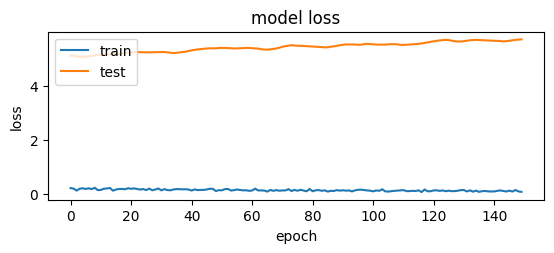

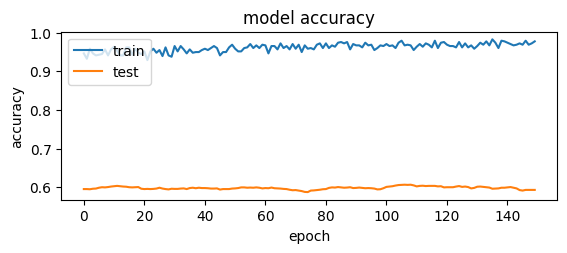

In [ ]:
def training_model(df,model,nn,data_no_scale,backup2,data_no_scale_2,train_2,ppx,ppy):
    x = df['userid']
    x = x.unique()
    X,y = [],[]
    m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
    lat,long=[],[]
    t_diff,d_diff = [],[]
    wcd,wcn = [],[]
    nc = []
    cof = []
    y = np.empty(0)

    for i in x:
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])



        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        #print("out ", out)
        y = np.append(y,out)

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_first.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)


    df = train_2
    x = df['userid']
    x = x.unique()

    for i in x:
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])


        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        #print("out ", out)
        y = np.append(y,out)

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_last.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)




    y = np.array(y)
    y = np_utils.to_categorical(y, nn) #converting output into categorical values

    d = np.array(d)
    d = np.reshape(d,(d.shape[0],d.shape[1],1))
    dt = np.array(dt)
    dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
    p = np.array(p)
    p = np.reshape(p,(p.shape[0],p.shape[1],1))
    nc = np.array(nc)
    nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
    m = np.array(m)
    m = np.reshape(m,(m.shape[0],m.shape[1],1))
    yr = np.array(yr)
    yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
    grp = np.array(grp)
    grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
    near_cls_grp = np.array(near_cls_grp)
    near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
    clsr_day = np.array(clsr_day)
    clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
    clstr_period = np.array(clstr_period)
    clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
    clstr_frnd = np.array(clstr_frnd)
    clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
    lat = np.array(lat)
    lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
    long = np.array(long)
    long = np.reshape(long,(long.shape[0],long.shape[1],1))
    t_diff = np.array(t_diff)
    t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
    d_diff = np.array(d_diff)
    d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
    pp = np.array(pp)
    pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
    wcd = np.array(wcd)
    wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
    wcn = np.array(wcn)
    wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))
    cof = np.array(cof)
    cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))
    ## this is current
    X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
    XX =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,pp,nc,lat,long,wcd,wcn,cof]
    hist = model.fit(X,y, validation_data=(ppx, ppy), epochs=150, batch_size=256, verbose=2)
    return model,hist
def prepare_test(df, model,nn,data_no_scale,backup2,test_2,data_no_scale_2):
    correct =0
    total =0
    x = df['userid']
    x = x.unique()
    feature = []
    X= []
    y = []
    total += 1
    m,d,p,yr,grp,dt,near_cls_grp,clsr_day,clstr_period,pp,clstr_frnd=[],[],[],[],[],[],[],[],[],[],[]
    lat,long=[],[]
    t_diff,d_diff = [],[]
    wcd,wcn=[],[]
    nc = []
    cof = []

    for i in x:
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])

        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        y.append(out)
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]


        week_data =pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_first.csv")
        week_data = week_data[week_data['userid'] == i]
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)

    data_no_scale = data_no_scale_2
    df = test_2
    x = df['userid']
    x = x.unique()

    for i in x:
        ins = data_no_scale[data_no_scale.userid == i]
        instance = df[df.userid == i]
        sample = instance
        d.append(sample['day'])
        dt.append(sample['date'])
        m.append(sample['month'])
        yr.append(sample['year'])
        p.append(sample['period'])
        t_diff.append(sample['time_diff'])
        clsr_day.append(sample['clstr_ofthe_day'])
        clstr_period.append(sample['clstr_ofthe_period'])

        cof.append(sample['clsoffrnd'])


        sample = sample.head(5)
        lat.append(sample['latitude'])
        long.append(sample['longitude'])
        d_diff.append(sample['dist_diff'])
        grp.append(sample['cluster_grp'])
        near_cls_grp.append(sample['near_cluster'])
        pp.append(sample['prob_of_pres'])
        nc.append(sample['nearest_cluster'])
        clstr_frnd.append(sample['clstr_of_friend'])

        instance = instance.to_numpy()
        len = instance.shape[0]
        col = instance.shape[1]
        out = instance[len-1][11]
        y.append(out)
        time = instance[len-1][9]*365*24 + instance[len-1][6] * 30 * 24 + instance[len-1][7] * 24 + instance[len-1][8]
        ins = ins.to_numpy()
        act_lat = ins[len-1][1]
        act_lon = ins[len-1][2]

        #wcd.append(week_cluster(i,backup2,0,time))
        #wcn.append(week_cluster(i,backup2,1,time))
        week_data = pd.read_csv("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/week_last.csv")
        week_data = week_data[week_data['userid'] == i]
        #week_data = week_data.head(1)
        wd = np.empty(7)
        wn = np.empty(7)
        for ind in week_data.index:
            wd[0],wd[1],wd[2]=int(week_data['wd1'][ind]),int(week_data['wd2'][ind]),int(week_data['wd3'][ind])
            wd[3],wd[4],wd[5],wd[6] = int(week_data['wd4'][ind]),int(week_data['wd5'][ind]),int(week_data['wd6'][ind]),int(week_data['wd7'][ind])

            wn[0],wn[1],wn[2]=int(week_data['wn1'][ind]),int(week_data['wn2'][ind]),int(week_data['wn3'][ind])
            wn[3],wn[4],wn[5],wn[6] = int(week_data['wn4'][ind]),int(week_data['wn5'][ind]),int(week_data['wn6'][ind]),int(week_data['wn7'][ind])
            break
        wd = np.array(wd)
        wn = np.array(wn)
        wcd.append(wd)
        wcn.append(wn)

    y = np.array(y)
    y = np_utils.to_categorical(y, nn)
    d = np.array(d)
    d = np.reshape(d,(d.shape[0],d.shape[1],1))
    nc = np.array(nc)
    nc = np.reshape(nc,(nc.shape[0],nc.shape[1],1))
    dt = np.array(dt)
    dt = np.reshape(dt,(dt.shape[0],dt.shape[1],1))
    p = np.array(p)
    p = np.reshape(p,(p.shape[0],p.shape[1],1))
    m = np.array(m)
    m = np.reshape(m,(m.shape[0],m.shape[1],1))
    yr = np.array(yr)
    yr = np.reshape(yr,(yr.shape[0],yr.shape[1],1))
    grp = np.array(grp)
    grp = np.reshape(grp,(grp.shape[0],grp.shape[1],1))
    near_cls_grp = np.array(near_cls_grp)
    near_cls_grp = np.reshape(near_cls_grp,(near_cls_grp.shape[0],near_cls_grp.shape[1],1))
    clsr_day = np.array(clsr_day)
    clsr_day = np.reshape(clsr_day,(clsr_day.shape[0],clsr_day.shape[1],1))
    clstr_period = np.array(clstr_period)
    clstr_period = np.reshape(clstr_period,(clstr_period.shape[0],clstr_period.shape[1],1))
    clstr_frnd = np.array(clstr_frnd)
    clstr_frnd = np.reshape(clstr_frnd,(clstr_frnd.shape[0],clstr_frnd.shape[1],1))
    lat = np.array(lat)
    lat = np.reshape(lat,(lat.shape[0],lat.shape[1],1))
    long = np.array(long)
    long = np.reshape(long,(long.shape[0],long.shape[1],1))
    t_diff = np.array(t_diff)
    t_diff = np.reshape(t_diff,(t_diff.shape[0],t_diff.shape[1],1))
    d_diff = np.array(d_diff)
    d_diff = np.reshape(d_diff,(d_diff.shape[0],d_diff.shape[1],1))
    pp = np.array(pp)
    pp = np.reshape(pp,(pp.shape[0],pp.shape[1],1))
    wcd = np.array(wcd)
    wcd = np.reshape(wcd,(wcd.shape[0],wcd.shape[1],1))
    wcn = np.array(wcn)
    wcn = np.reshape(wcn,(wcn.shape[0],wcn.shape[1],1))

    cof = np.array(cof)
    cof = np.reshape(cof,(cof.shape[0],cof.shape[1],1))

    ## this is current
    X =[d,p,grp,near_cls_grp,clsr_day,clstr_period,clstr_frnd,t_diff,d_diff,pp,nc,lat,long,wcd,wcn,cof]
    return X,y
ppx,ppy = prepare_test(test,model,nn,data_no_scale,backup2,test_2,data_no_scale_2)
model,hist=training_model(train,model,nn,data_no_scale,backup2,data_no_scale_2,train_2,ppx,ppy)
plt.subplot(2,1,1)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.savefig("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/loss_vs_epoch_1.jpg",dpi=300)
plt.show()

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/accuracy_vs_epoch_2.jpg",dpi=300)
plt.show()


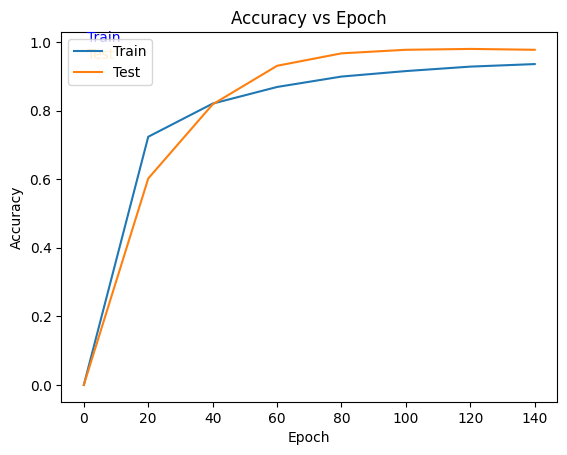

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a list of accuracies
# for each epoch for both train and test data
train_acc = [0,0.7238,0.82050,0.8690,0.8994,0.9154,0.9284,0.9358]
test_acc = [0,0.6021,0.8183,0.9308,0.9671,0.9775,0.98,0.9775]

# Create a list of epochs to use as the x-axis
epochs = [0,20,40,60, 80, 100, 120, 140]

# Plot the train and test accuracies as lines on the same graph
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, test_acc, label='Test')

# Add a legend to the graph
plt.legend()

# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a title for the graph
plt.title('Accuracy vs Epoch')

# Add symbols for train and test on top left
plt.text(1,1,'Train',fontsize=10,color='blue')
plt.text(1,0.95,'Test',fontsize=10,color='orange')

plt.savefig("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/accuracy_vs_epoch.jpg",dpi=300)
# Display the graph
plt.show()


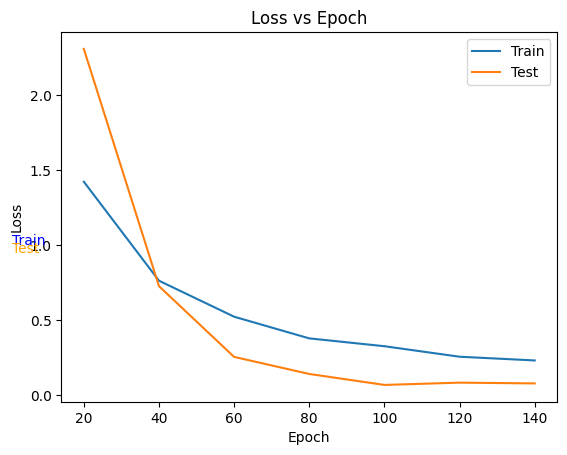

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a list of accuracies
# for each epoch for both train and test data
train_acc = [1.424,0.7635,0.5233,0.3787,0.3264,0.2563,0.2315]
test_acc = [2.31,0.7271,0.2551,0.1413,0.0682,0.0834,0.0782]

# Create a list of epochs to use as the x-axis
epochs = [20,40,60, 80, 100, 120, 140]

# Plot the train and test accuracies as lines on the same graph
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, test_acc, label='Test')

# Add a legend to the graph
plt.legend()

# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Add a title for the graph
plt.title('Loss vs Epoch')

# Add symbols for train and test on top left
plt.text(1,1,'Train',fontsize=10,color='blue')
plt.text(1,0.95,'Test',fontsize=10,color='orange')

plt.savefig("/content/drive/MyDrive/Meetup_Prediction_Google_Collab/loss_vs_epoch.jpg",dpi=300)
# Display the graph
plt.show()
